In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the data

In [3]:
# Load data
data = pd.read_csv('CSV_homedelv_2018.csv', index_col=[0])

df_temp = data.copy()

df_temp.columns= df_temp.columns.str.upper()

In [7]:
data.shape

(53024, 240)

In [66]:
df_2018 = df_temp[(df_temp['BFACIL'] > 2) & (df_temp['BFACIL'] < 7)]

In [65]:
data1 = pd.read_csv('CSV_homedelv_2017.csv', index_col=[0])

df_temp1 = data1.copy()

df_temp1.columns= df_temp1.columns.str.upper()

C:\Users\rdeo\anaconda3\envs\insight_prj\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
df_2017 = df_temp1[(df_temp1['BFACIL'] > 2) & (df_temp1['BFACIL'] < 7)]

In [ ]:
df_2yrs= pd.concat([df_2018, df_2017], axis=0)

## Cleaning the data

In [393]:
train_fd_sel_unedited =['BFACIL','MAGER', 'MAGER14','MAGER9', 'MBSTATE_REC','RESTATUS', 'MRACE31', 'MRACE6', 'MRACE15', 'MBRACE', 'MRACEIMP', 
         'MHISP_R', 'F_MHISP', 'MRACEHISP', 'MAR_P','DMAR','MAR_IMP','F_MAR_P','MEDUC','F_MEDUC','FAGERPT_FLG','FAGECOMB',
         'FAGEREC11','FRACE31','FRACE6','FRACE15','FBRACE','FHISP_R','F_FHISP','FRACEHISP','FEDUC','PRIORLIVE','PRIORDEAD',
         'PRIORTERM', 'LBO_REC','TBO_REC', 'ILLB_R', 'ILLB_R11', 'ILOP_R', 'ILOP_R11', 'ILP_R', 'ILP_R11', 'PRECARE',
         'F_MPCB', 'PRECARE5', 'PREVIS','PREVIS_REC', 'F_TPCV', 'WIC','F_WIC', 'CIG_0', 'CIG_1', 'CIG_2', 'CIG_3', 'CIG0_R',
         'CIG1_R', 'CIG2_R', 'CIG3_R', 'F_CIGS_0', 'F_CIGS_1', 'F_CIGS_2', 'F_CIGS_3', 'CIG_REC', 'F_TOBACO', 'M_HT_IN',
         'F_M_HT', 'BMI', 'BMI_R', 'PWGT_R', 'F_PWGT', 'DWGT_R', 'F_DWGT', 'WTGAIN', 'WTGAIN_REC', 'F_WTGAIN', 'RF_PDIAB',
         'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'F_RF_PDIAB', 'F_RF_GDIAB', 'F_RF_PHYPER', 'F_RF_GHYPER',
         'F_RF_ECLAMP', 'F_RF_PPB', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 'F_RF_INF_DRG', 'F_RF_INF_ART', 'RF_CESAR', 'RF_CESARN',
         'F_RF_CESAR', 'F_RF_NCESAR', 'NO_RISKS', 'IP_GON', 'IP_SYPH', 'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC']

In [9]:
train_fd_sel_new =['MAGER','PRIORLIVE','PRIORDEAD','PRIORTERM', 'LBO_REC','TBO_REC', 'ILLB_R11', 'ILP_R11','PRECARE', 'PREVIS',
               'WIC','CIG_0', 'CIG_1', 'CIG_2', 'CIG_3', 'M_HT_IN','BMI' ,'PWGT_R', 'DWGT_R', 'WTGAIN','ILOP_R11',
               'RF_PDIAB','RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 
               'RF_CESARN','IP_GON', 'IP_SYPH', 'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC']

target_fd_sel = ['DMETH_REC', 'APGAR5','MM_MTR','MM_PLAC','MM_AICU','MTRAN',
             'AB_AVEN1','AB_AVEN6','AB_NICU','AB_SURF','AB_ANTI','AB_SEIZ']

fd_sel = train_fd_sel_new + target_fd_sel
             
target_fd_check = ['CA_ANEN', 'OB_ECVS','OB_ECVF','CA_MNSB', 'CA_CCHD', 'CA_CDH', 
                   'CA_OMPH', 'CA_GAST', 'CA_LIMB', 'CA_CLEFT', 'CA_CLPAL',
                   'CA_DOWNS', 'CA_DISOR', 'CA_HYPO']

In [10]:
df = df_temp[fd_sel]

In [11]:
df.shape

(53024, 48)

In [12]:
###Following are the category code for unknown status in each fo the features and can be removed if required

##AMONG ====''MAGER9','RESTATUS','MBRACE','MHISP_R','MEDUC','FAGEREC11','FRACE6','FHISP_R','FEDUC'===##

#df = df[df['MHISP_R']!=9]
#df = df[df['MEDUC']!=9]
#df = df[df['FAGEREC11']!=11]
#df = df[df['FRACE6']!=9]
#df = df[df['FHISP_R']!=9]
#df = df[df['FEDUC']!=9]

##'PRIORLIVE','PRIORDEAD','PRIORTERM'
df = df[df['PRIORLIVE']!=99] ##0-30 is the range of values
df = df[df['PRIORDEAD']!=99]##0-30 is the range of values
df = df[df['PRIORTERM']!=99]##0-30 is the range of values

###'LBO_REC','TBO_REC', 'ILLB_R11', 'ILP_R'
df = df[df['LBO_REC']!=9]


df = df[df['ILLB_R11']!=99] ## 88 -N/A first live birth
df = df[df['ILP_R11']!=99] ###88 Not applicable / no previous pregnancy 
df = df[df['ILOP_R11']!=99]###88 Not applicable / no previous pregnancy


df['ILP_R11'].replace(88, 9,inplace=True)
df['ILLB_R11'].replace(88, 9,inplace=True)
df['ILOP_R11'].replace(88, 9,inplace=True)

##'PRECARE', 'PREVIS'
df = df[df['PRECARE']!=99]
df = df[df['PREVIS']!=99]

##'WIC','CIG_0', 'CIG_1', 'CIG_2', 'CIG_3',
df = df[df['WIC']!='U']
df = df[df['CIG_0']!=99]
df = df[df['CIG_1']!=99]
df = df[df['CIG_2']!=99]
df = df[df['CIG_3']!=99]

 ###'M_HT_IN','BMI','PWGT_R', 'DWGT_R', 'WTGAIN',

df = df[df['M_HT_IN']!= 99]
df = df[df['BMI']!=99.9]
df = df[df['PWGT_R']!=999]
df = df[df['DWGT_R']!=999]
df = df[df['WTGAIN']!=99]


###'RF_PDIAB','RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 'RF_CESARN'
df = df[df['RF_CESARN']!= 99]
df = df[df['RF_PDIAB']!= 'U']
df = df[df['RF_GDIAB']!= 'U']
df = df[df['RF_PHYPE']!= 'U']
df = df[df['RF_GHYPE']!= 'U']
df = df[df['RF_EHYPE']!= 'U']
df = df[df['RF_PPTERM']!= 'U']
df = df[df['RF_INFTR']!= 'U']
df = df[df['RF_FEDRG']!= 'U']
df = df[df['RF_ARTEC']!= 'U']

###IP_GON', 'IP_SYPH', 'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC'
df = df[df['IP_GON']!= 'U']
df = df[df['IP_SYPH']!= 'U']
df = df[df['IP_CHLAM']!= 'U']
df = df[df['IP_HEPATB']!= 'U']
df = df[df['IP_HEPATC']!= 'U']

In [13]:
df.shape

(44036, 48)

## Target Columns

In [14]:
###Target column preparation
###'DMETH_REC', 'APGAR5','MM_MTR','MM_PLAC','MM_RUPT','MM_UHYST','MM_AICU',
            
df = df[df['DMETH_REC']!= 9]
df = df[df['APGAR5']!= 99]
df = df[df['MM_MTR']!='U']
df = df[df['MM_PLAC']!= 'U']
#df = df[df['MM_RUPT']!='U']
df = df[df['MTRAN']!='U']
df = df[df['MM_AICU']!= 'U']

###'AB_AVEN1','AB_AVEN6','AB_NICU','AB_SURF','AB_ANTI','AB_SEIZ'
df = df[df['AB_AVEN1']!= 9]
df = df[df['AB_AVEN6']!= 99]
df = df[df['AB_NICU']!='U']
df = df[df['AB_SURF']!= 'U']
df = df[df['AB_ANTI']!='U']
df = df[df['AB_SEIZ']!= 'U']



In [15]:
df.shape

(39379, 48)

In [16]:
df['AB_NICU'].value_counts()

N    38617
Y      762
Name: AB_NICU, dtype: int64

### Distribution of target columns

In [192]:
df['DMETH_REC'].value_counts()

1    45102
2      110
Name: DMETH_REC, dtype: int64

In [193]:
df['APGAR5'].value_counts()

9     23815
10    15351
8      4059
7       970
6       367
5       239
0       153
4        87
1        62
3        56
2        53
Name: APGAR5, dtype: int64

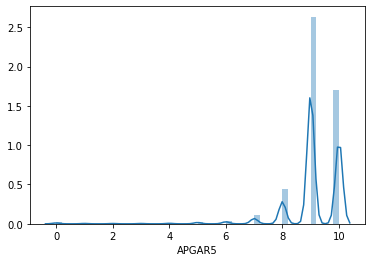

In [90]:
sns.distplot(df['APGAR5'])

In [71]:
df['MM_AICU'].value_counts()

N    45546
Y       30
Name: MM_AICU, dtype: int64

In [72]:
#df = df[df['CA_ANEN']!='U']
#df = df[df['CA_MNSB']!='U']
#df = df[df['CA_CCHD']!='U']
#df = df[df['CA_CDH']!='U']
#df = df[df['CA_OMPH']!='U']
#df = df[df['CA_GAST']!= 'U']
#df = df[df['CA_LIMB']!='U']
#df = df[df['CA_CLEFT']!='U']
#df = df[df['CA_HYPO']!= 'U']
#df = df[df['CA_CLPAL']!='U']
#df = df[df['CA_DOWNS']!='U']
#df = df[df['CA_DISOR']!= 'U']
#
#df = df[df['OB_ECVS']!= 'U']
#df = df[df['OB_ECVF']!='U']

In [91]:
df.shape

(45212, 48)

## Preparing the target variable("risk or norisk") combining multiple features

In [17]:
target_fd = ['DMETH_REC','APGAR5','MM_MTR','MM_PLAC','MM_AICU','MTRAN',
             'AB_AVEN1','AB_AVEN6','AB_NICU','AB_SURF','AB_ANTI','AB_SEIZ']

In [18]:
df_t=df.loc[:,target_fd]

In [19]:
df_t.shape

(39379, 12)

In [20]:
df_target= df_t.copy()

In [21]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39379 entries, 5 to 549459989
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DMETH_REC  39379 non-null  int64 
 1   APGAR5     39379 non-null  int64 
 2   MM_MTR     39379 non-null  object
 3   MM_PLAC    39379 non-null  object
 4   MM_AICU    39379 non-null  object
 5   MTRAN      39379 non-null  object
 6   AB_AVEN1   39379 non-null  object
 7   AB_AVEN6   39379 non-null  object
 8   AB_NICU    39379 non-null  object
 9   AB_SURF    39379 non-null  object
 10  AB_ANTI    39379 non-null  object
 11  AB_SEIZ    39379 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.9+ MB


In [22]:
df_target[df_target['DMETH_REC']==1]['AB_NICU'].value_counts()

N    38544
Y      746
Name: AB_NICU, dtype: int64

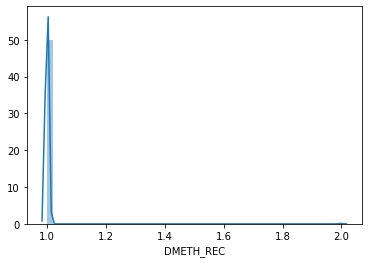

In [23]:
sns.distplot(df_target['DMETH_REC'])

In [24]:
##Converting the categories(P,N) to N and categories(C) to Y of column CA_DOWNS and CA_DISOR

#df_target.replace(['P'], 'N', inplace=True)
#df_target.replace(['C'], 'Y', inplace=True)

In [25]:
##APGAR score of 0 to 3 indicates an infant in need of resuscitation; a score of 4 to 6 is considered intermediate;
##a score of 7 or greater indicates that the neonate is in good to excellent physical condn
df_target['APGAR5'].replace([0,1,2,3,4,5,6], 1,inplace=True)
df_target['APGAR5'].replace([7,8,9,10], 0,inplace=True)

In [26]:
df_target['APGAR5'].unique()

array([0, 1], dtype=int64)

In [27]:
df_target['DMETH_REC'].replace(1, 0,inplace=True)
df_target['DMETH_REC'].replace(2, 1,inplace=True)

In [28]:
df_target['DMETH_REC'].unique()

array([0, 1], dtype=int64)

In [29]:
df_target

,DMETH_REC,APGAR5,MM_MTR,MM_PLAC,MM_AICU,MTRAN,AB_AVEN1,AB_AVEN6,AB_NICU,AB_SURF,AB_ANTI,AB_SEIZ
index,,,,,,,,,,,,
5,0,0,N,N,N,N,N,N,N,N,N,N
33,0,0,N,N,N,N,N,N,N,N,N,N
63,0,0,N,N,N,N,N,N,N,N,N,N
66,0,0,N,Y,N,N,N,N,N,N,N,N
169,0,0,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
549459425,0,0,N,N,N,N,N,N,N,N,N,N
549459631,0,0,N,N,N,N,N,N,N,N,N,N
549459633,0,0,N,N,N,N,N,N,N,N,N,N


In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_target.select_dtypes(include = ['object']).columns:
    
    le.fit(df_target[col].unique())
    df_target.loc[:, col] = le.transform(df_target[col])
#df_val = le.fit_transform(df_target)

In [31]:
df_val = df_target.copy()

In [32]:
df_val.loc[:,'comb'] =   df_val.sum(axis=1)

In [33]:
df_val

,DMETH_REC,APGAR5,MM_MTR,MM_PLAC,MM_AICU,MTRAN,AB_AVEN1,AB_AVEN6,AB_NICU,AB_SURF,AB_ANTI,AB_SEIZ,comb
index,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,0,0,0
66,0,0,0,1,0,0,0,0,0,0,0,0,1
169,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549459425,0,0,0,0,0,0,0,0,0,0,0,0,0
549459631,0,0,0,0,0,0,0,0,0,0,0,0,0
549459633,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df_val['comb'].unique()

array([0, 1, 2, 5, 4, 3, 6, 7], dtype=int64)

In [35]:
##if sum>0 then there is risk and is not safe
df_risk = df_val['comb'].replace([1, 2, 4, 3, 6, 5,7,8], 1)


In [36]:
df_risk.value_counts(normalize=True)

0    0.931816
1    0.068184
Name: comb, dtype: float64

In [37]:
df_t.shape

(39379, 12)

In [38]:
df_risk.shape

(39379,)

# Final cleaned full database

In [47]:
df_fin = pd.concat([df, df_risk],axis=1)

In [48]:
df_fin.shape

(39379, 49)

In [49]:
df_x = df_fin.iloc[:,0:36]


In [50]:
df_x.columns

Index(['MAGER', 'PRIORLIVE', 'PRIORDEAD', 'PRIORTERM', 'LBO_REC', 'TBO_REC',
       'ILLB_R11', 'ILP_R11', 'PRECARE', 'PREVIS', 'WIC', 'CIG_0', 'CIG_1',
       'CIG_2', 'CIG_3', 'M_HT_IN', 'BMI', 'PWGT_R', 'DWGT_R', 'WTGAIN',
       'ILOP_R11', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE',
       'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 'RF_CESARN', 'IP_GON',
       'IP_SYPH', 'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC'],
      dtype='object')

In [51]:
df_y = df_fin.comb

In [52]:
df_fin_fin = pd.concat([df_x, df_y],axis=1)

In [53]:
###df_fin_fin.to_csv('fin_inpdata2018.csv', index=False)

In [54]:
df_fin_fin.shape

(39379, 37)